# <u>Walmart Product Review Analysis <u/>

### Notebook
This notebook's sole purpose is to clean the continuous variables. 

## Business Motivation

2020 has been a hectic year but it has shown the importance of technology across all sectors. One of the major sectors being retail. 
"Save Money, Live Better" is Walmart's motto and philosophy and inorder for Walmart to live by their slogan, they need to be able to get the "best" items out for their customers based on the customer's want and need, both in store and online. 

Walmart is known for being the [King of retail stores](https://www.pioneeringminds.com/walmart/) but this is taking the physical stores into account. Since 2017, Walmart has made strong initiative to strengthen their online presence. Amidst the pandemic, Walmart saw a [74% increase in online sales in the first quarter](https://www.supermarketnews.com/retail-financial/walmart-sees-q1-us-comps-jump-10-online-sales-soar-74) as people worked from home and required goods to be delivered due to limited access to physical locations. 

However, currently, Walmart's online market promotes clothing products by price range and brand. Within these subcategory, itesm are displayed by "clerance", "best seller" and then the new and regular items. 

Clearance are the items on sale - "save money, live better" - this makes sense. The "new" and regualr items are the rest of the goods that Walmart carries - this also makes sense. 

However, most of the "best seller" items that I found, had very few people rateings on them and some did not even contain any text reviews. **Walmart might have generated these "best seller" items from their sales data but for an online space, where customers cannot touch or feel the products, its really important to get feedback from other purchasers.** So recommending products based on purely sales records does not help in the online space.

Now if Walmart were able to analyze customer's reviews and promote goods based on customer's "recommended" score and descriptive keywords, Walmart's marketing team would then be better able to market products that resonates with more customers.


### Goal
This analysis will look at Walmart clothing reviews to find key features that predict whether a customer will recommend an item or not. The features that guide the predictions can then used to guide Walmart's online and/or in-store marketing/product campaigns. This investigation will be conducted using [Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing) packages and libraries. 

# Data

Data was scraped directly from the Walmart webpage. The notebooks for scraping can be found in the [Walmart Scraper](https://github.com/dorjeys3/Walmart_proj/tree/master/Walmart_scraper) folder. 

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# necessary for data visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)


### Import scraped dataframes

In [2]:
mens_df = pd.read_csv("data/item_review/walmart_reviews.csv", index_col=0)
womens_df = pd.read_csv("data/item_review/walmart_womens_reviews.csv", index_col=0)
boys_df = pd.read_csv("data/item_review/walmart_boys_clothing_reviews.csv", index_col=0)
girls_df = pd.read_csv("data/item_review/walmart_girls_clothing_reviews.csv", index_col=0)

In [3]:
# dropping all duplicates and "Unnamed: 0" columns and adding a section feature
womens_df.drop_duplicates(subset="item_name", inplace=True)
womens_df["section"] = "women's clothing"


mens_df.drop_duplicates(subset="item_name", inplace=True)
mens_df["section"] = "men's clothing"


boys_df.drop_duplicates(subset="item_name", inplace=True)
boys_df["section"] = "boy's clothing"


girls_df.drop_duplicates(subset="item_name", inplace=True)
girls_df["section"]="girl's clothing"

In [4]:
mens_df.to_csv("data/item_review/walmart_mens_reviews.csv")

In [5]:
# print(mens_df.shape)
# print(womens_df.shape)
# print(boys_df.shape)
# print(girls_df.shape)

There are 308 men's clothing, 471 women's clothing, 154 boys' clothing and 292 girls' clothing. Resulting in 1,225 observations. 

# Concatenating the different files into one dataframe

In [6]:
frames = [mens_df, womens_df, boys_df, girls_df]
# I will be working with cleaning_df going forward in this notebook
cleaning_df = pd.concat(frames, ignore_index=True)

In [7]:
# confirming the number of observations
cleaning_df.shape

(1225, 10)

In [8]:
# #saving the newly made dataframe. 
# cleaning_df.to_csv("data/cleaning_df.csv")

Things to check: 
- If overall rating = NaN, then 0. 
- If recommened = NaN, then 0. 
- But check the num_rating condition first. This would mean that not enough people have given the item a review. 

In [9]:
cleaning_df[cleaning_df.num_rating==0]

,item_name,price,overall_rating,num_rating,recommend,rev_title,rev_date,review_text,rating_stars,section


In [10]:
cleaning_df.review_text[6]

'[\'They were exactly what I was searching for! Nice, thick material and definitely worth the price. Ive seen the exact same ones in other stores for $50-$60. I did the next day shipping because I needed them for a camping trip two days after I ordered and still had to iron on the vinyl. It delivered right on time which I was nervous about.\', \'I actually did not expect this hoodie to be this comfortable and warm. I bought the purple hoodie and i thought it was going to be a light purple, but im still happy with this color\', \'I got these sweatshirts in white for my boyfriend and I to tie dye using two shades of blue Ritt Dye. The fabric held the color BEAUTIFULLY and out horsies turned out so dreamy!! 100% recommend. Super soft inside and a medium weight.\', \'Great quality and despite the pandemic it came on time! [This review was collected as part of a promotion.]\', "I am a HUGE fan of the Powerblend Hoodie! I have several, and I love the softness, comfort, and quality of the mat

In [11]:
cleaning_df.rev_date[500]

'April 8, 2020'

In [12]:
cleaning_df.num_rating[500]

'456 ratings'

In [13]:
cleaning_df.price[500]

'$8.24 $ 8 . 24 $8.24 $ 8 . 24'

In [14]:
cleaning_df.isnull().sum()

item_name           2
price               2
overall_rating    108
num_rating          0
recommend         108
rev_title         121
rev_date            2
review_text        76
rating_stars        2
section             0
dtype: int64

## Null values
There are null values in all features, except num_rating and section. 
- "Rev_date" is not a helpful column, so will drop that column entirely. 
- In order to declare which items will do well and wont, I will need name of the item. Thus I will drop the two items
- I will need to look more into "overall_rating" and "recommend"
- rating starts will probably changed to 0. but will need to look more into it.

Regarding the text, the EDA will be done in the next notebook. 
- Where there is no "rev_title", I will add "No Title". This is only for EDA purpose. 
- I will need to look more closly into the review_text before dropping any rows. 
 

In [15]:
# droppping rev_date as mentioned above
cleaning_df.drop(columns = "rev_date", inplace = True)
# droppping item_name as mentioned above
cleaning_df.dropna(subset=["item_name"], axis = 0, how="any", inplace=True)
# confirming the rev_date column and null values from item_name were dropped. 
cleaning_df.isnull().sum()

item_name           0
price               0
overall_rating    106
num_rating          0
recommend         106
rev_title         119
review_text        74
rating_stars        0
section             0
dtype: int64

In [16]:
# filling null values in overall rating to 0. 
cleaning_df["overall_rating"] = cleaning_df["overall_rating"].fillna(0)
# confirming the replacement of null values in overall rating
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_name       1223 non-null   object 
 1   price           1223 non-null   object 
 2   overall_rating  1223 non-null   float64
 3   num_rating      1223 non-null   object 
 4   recommend       1117 non-null   object 
 5   rev_title       1104 non-null   object 
 6   review_text     1149 non-null   object 
 7   rating_stars    1223 non-null   object 
 8   section         1223 non-null   object 
dtypes: float64(1), object(8)
memory usage: 95.5+ KB


In [17]:
# if recommended score is null, then it is replcaed by a 0. I did not want to interject my own bias by scoring the item. 
cleaning_df["recommend"].fillna(0, inplace = True)
# if review_title is null, then it is replcaed by a "No title". I did not want to interject my own bias.
cleaning_df["rev_title"].fillna("No Title", inplace = True)

In [18]:
cleaning_df.isna().sum()

item_name          0
price              0
overall_rating     0
num_rating         0
recommend          0
rev_title          0
review_text       74
rating_stars       0
section            0
dtype: int64

Now that all null values have been addressed, we can proceed to cleaning and removing all unnecessary characters from the continuous variables. 

### Data Cleaning
All the contineous values have a lot of unnecessary characters. The end goal will be to: 
- remove $ sign from "price" and only have 1 of 4 price
- remove the trailing "ratings" from "num_ratings" column
- remove the percentage sign from "recommend" column 

## Cleaning price and ratings column 

In [19]:
# function lives in the scripts folder
def convertor(x):
    '''Converts string to a list and returns index 0'''
    #used to clean raw price column and num_rating column
    x = list(x.split(" "))
    return x[0]


In [20]:
cleaning_df["price"] = cleaning_df["price"].apply(convertor)
cleaning_df["num_rating"] = cleaning_df["num_rating"].apply(convertor)

In [21]:
def remove_dollar(x):
    x = list(x.split("$"))
    return x[1]

In [22]:
cleaning_df["price"]= cleaning_df["price"].apply(remove_dollar)

In [23]:
#confirming that the functions work and data is clean. 
cleaning_df

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
0,Wrangler Men's Unlined Shirt Jacket,12.00,4.0,7,80%,['Texas winter ready!'],['I bought this last year and am going to buy ...,['Average Rating: ( 5.0 ) out of 5 stars 7 rat...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,12.00,4.5,5840,90%,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",['Average Rating: ( 5.0 ) out of 5 stars 5840 ...,men's clothing
2,Wrangler Big Men's Relaxed Fit Jean,15.00,4.3,3257,88%,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",['Average Rating: ( 5.0 ) out of 5 stars 3257 ...,men's clothing
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.00,4.5,259,91%,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,['Average Rating: ( 5.0 ) out of 5 stars 259 r...,men's clothing
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.00,4.6,1490,91%,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,['Average Rating: ( 5.0 ) out of 5 stars 1490 ...,men's clothing
...,...,...,...,...,...,...,...,...,...
1220,"dELiA*s Girls Pajama Set, 2-Piece, Sizes 7-16",17.60,4.4,8,75%,No Title,"[""This was very small. The 14-16 was way too l...",['Average Rating: ( 3.0 ) out of 5 stars 8 rat...,girl's clothing
1221,Toddler Kids Baby Girls Outfit Floral Top Blou...,15.99,2.5,6,40%,['go up a size'],['make sure to go up a size. shirt runs small ...,['Average Rating: ( 3.0 ) out of 5 stars 6 rat...,girl's clothing
1222,Child of Mine by Carter's Baby & Toddler Girls...,12.94,4.8,6,100%,"['I Wish It Came in Adult Sizes', 'Very Cute',...",['This is the cutest outfit! The top is a litt...,['Average Rating: ( 5.0 ) out of 5 stars 6 rat...,girl's clothing
1223,Wonder Nation Girls Plush Full-Zip Jacket with...,12.00,4.4,28,90%,"['Nice plush jacket', 'Fluffy hoodie', 'So sof...",['A nice plush jacket for a young girl. It is ...,['Average Rating: ( 5.0 ) out of 5 stars 28 ra...,girl's clothing


In [24]:
cleaning_df["num_rating"]=cleaning_df["num_rating"].astype("float64")
cleaning_df["price"]=cleaning_df["price"].astype("float64")
cleaning_df["recommend"]=cleaning_df["recommend"].astype("string")

In [25]:
# function lives in the scripts folder
def remove_perc(x):
    x = list(x.split("%"))
    return x[0]

cleaning_df["recommend"]= cleaning_df["recommend"].apply(remove_perc)

In [26]:
cleaning_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80,['Texas winter ready!'],['I bought this last year and am going to buy ...,['Average Rating: ( 5.0 ) out of 5 stars 7 rat...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",['Average Rating: ( 5.0 ) out of 5 stars 5840 ...,men's clothing
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",['Average Rating: ( 5.0 ) out of 5 stars 3257 ...,men's clothing
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,['Average Rating: ( 5.0 ) out of 5 stars 259 r...,men's clothing
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,['Average Rating: ( 5.0 ) out of 5 stars 1490 ...,men's clothing


#### Taking a closer inspection at "rating_stars" column

In [27]:
cleaning_df.rating_stars[0]

"['Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 2.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 1.0 ) out of 5 stars 7 ratings , based on 7 reviews']"

In [28]:
# I think it makes sense to remove the entire ratings column since we already have an overall raiting of the item.
cleaning_df.drop(columns="rating_stars", inplace = True)
# The review titles are not helpful and do not really add much to the scope of the project. Therefore will be dropping it.
cleaning_df.drop(columns = "rev_title", inplace = True)

## Closer inspection into the null values in review_text column. 

In [29]:
nan_rows = cleaning_df[cleaning_df["review_text"].isnull()]

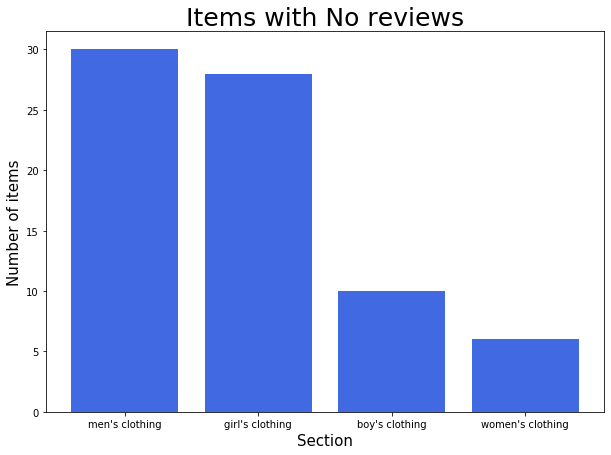

In [30]:
x = nan_rows.section.value_counts()
fig,ax = plt.subplots(figsize = (10,7))
plt.bar(x=x.index, height=x.values, color = ["RoyalBlue"])
plt.title("Items with No reviews", fontsize = 25)
plt.xlabel("Section", fontsize = 15)
plt.ylabel("Number of items", fontsize = 15)
plt.savefig("images/items_no_reviews");

- These are all the observations that have a rating score but no reviews. 
- Women's clothing group has the most items/observations and also the least amount of non-reviewd items. 
- Surprisingly, men's clothing and girls' clothing have a large amount of observations without reviews. 
 I will be dropping the null values in review_text. If I fill in the null values, it will cause bias and/or add unnecessary data. 

In [31]:
cleaning_df.dropna(subset=["review_text"], inplace = True)

In [32]:
# converting the continuous values to float type. 
cleaning_df["num_rating"]=cleaning_df["num_rating"].astype("float64")
cleaning_df["recommend"]=cleaning_df["recommend"].astype("float64")

In [33]:
#confirming float type
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_name       1149 non-null   object 
 1   price           1149 non-null   float64
 2   overall_rating  1149 non-null   float64
 3   num_rating      1149 non-null   float64
 4   recommend       1149 non-null   float64
 5   review_text     1149 non-null   object 
 6   section         1149 non-null   object 
dtypes: float64(4), object(3)
memory usage: 71.8+ KB


In [34]:
# confirming all continuous variables look clean.
cleaning_df.head(2)

,item_name,price,overall_rating,num_rating,recommend,review_text,section
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['I bought this last year and am going to buy ...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['I like wrangler, the pants is exactly for my...",men's clothing


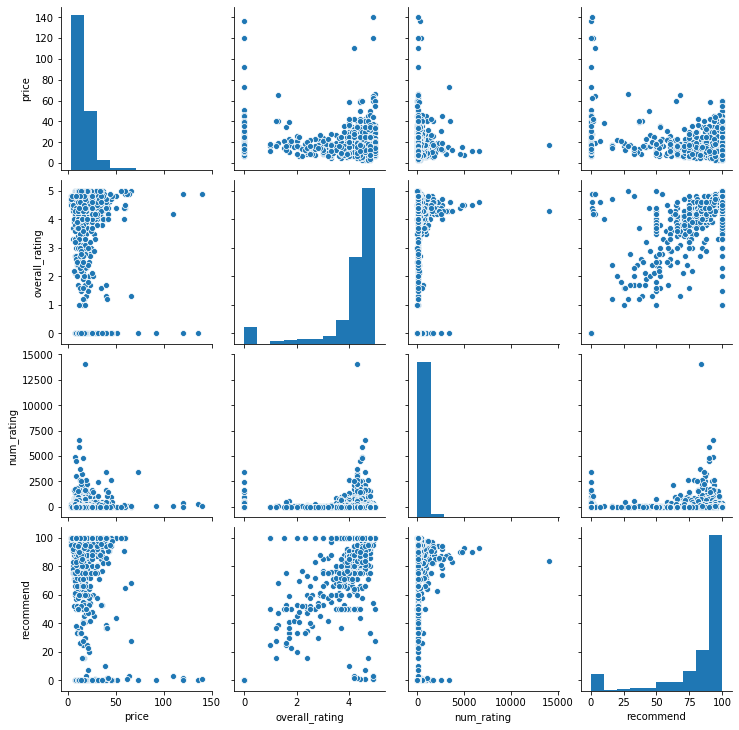

In [35]:
#pairplot to study the relationship between the continuous variables
sns.pairplot(cleaning_df);

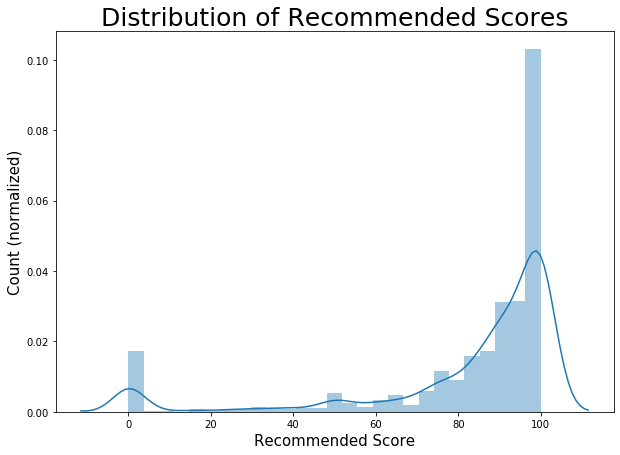

In [36]:
fig,ax = plt.subplots(figsize = (10,7))
sns.distplot(cleaning_df["recommend"])
plt.title("Distribution of Recommended Scores", fontsize = 25)
plt.xlabel("Recommended Score", fontsize = 15)
plt.ylabel("Count (normalized)", fontsize = 15)
plt.savefig("images/recommended_dist");

In [37]:
print(f"The median is {np.median(cleaning_df['recommend'])}")
print(f"The mean is {np.mean(cleaning_df['recommend'])}")
print(f"The mode is {stats.mode(cleaning_df['recommend'])}")

The median is 92.0
The mean is 82.6858137510879
The mode is ModeResult(mode=array([100.]), count=array([403]))


Based on some preliminary text analysis and Walmart online market browsing, items recommended over 85% tend to have more positive than items below 85%. Therefore, I will create a hard split on 85 as **not recommended (0)** and **recommended (1)**

In [38]:
#0 - not recommended
#1 - recommended
target = []
for x in cleaning_df["recommend"]:
    if x >= 83:
        target.append(1)
    else:
        target.append(0)
        

In [39]:
cleaning_df["target"] = target

In [40]:
cleaning_df["target"].value_counts()

1    836
0    313
Name: target, dtype: int64

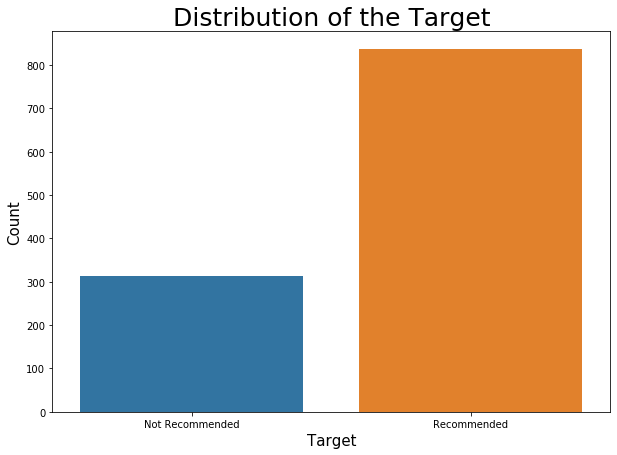

In [41]:
fig,ax = plt.subplots(figsize = (10,7))
sns.countplot(x=cleaning_df["target"])
plt.title("Distribution of the Target", fontsize = 25)
plt.xlabel("Target", fontsize = 15)
plt.ylabel("Count", fontsize = 15);
ax.set_xticklabels(['Not Recommended', 'Recommended'])
plt.savefig("images/target.png");

- There is a class imbalance in my target group. 
- The "recommended" group is greater than 2 times the size of "not recommended". 
- I will need to consider how to deal with that before I beging modeling. 

In [42]:
# resetting index just to refraim the dataset since we removed all the "No review" group.  
cleaning_df.reset_index(drop = True, inplace=True)

In [43]:
#confirming the index has been reset 
cleaning_df.head(7)

,item_name,price,overall_rating,num_rating,recommend,review_text,section,target
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['I bought this last year and am going to buy ...,men's clothing,0
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['I like wrangler, the pants is exactly for my...",men's clothing,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"[""If you like Big Men's style wearing jeans th...",men's clothing,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,['My husband loves these jeans and goes throug...,men's clothing,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Fit well Great price same jeans I was buying...,men's clothing,1
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,['They were exactly what I was searching for! ...,men's clothing,1
6,Fruit of the Loom Men's Core Waffle Thermal Top,5.0,3.3,9.0,100.0,['These are very cozy! Body pair for me and my...,men's clothing,1


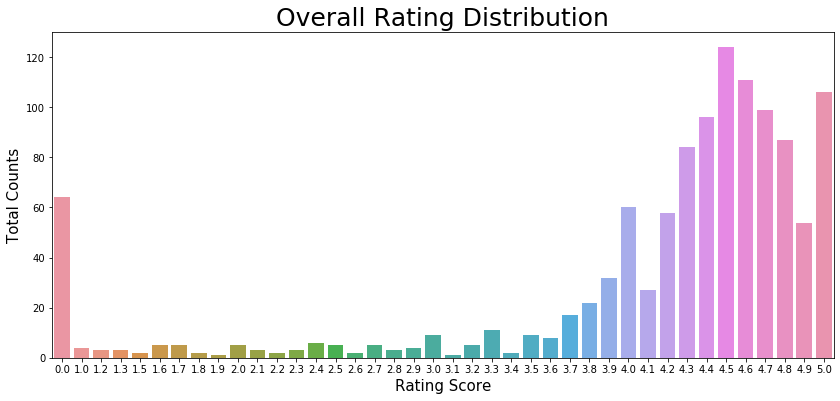

In [44]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(x=cleaning_df["overall_rating"])
plt.title("Overall Rating Distribution", fontsize = 25)
plt.xlabel("Rating Score", fontsize = 15)
plt.ylabel("Total Counts", fontsize = 15)
plt.savefig("images/overall_rating");

Since majority of the rating score lies between 4 - 5, it would be better if I classified the rating scores into categories. There will be three categories:
- under 4.0 rating
- 4.0-4.5 (exclusive)
- 4.5-5.0. 

In [45]:
rating_bin = []
for x in cleaning_df["overall_rating"]:
    if x < 4:
        rating_bin.append(0)
    elif x >4.5:
        rating_bin.append(2)
    else:
        rating_bin.append(1)
        
cleaning_df["rating_bin"] = rating_bin

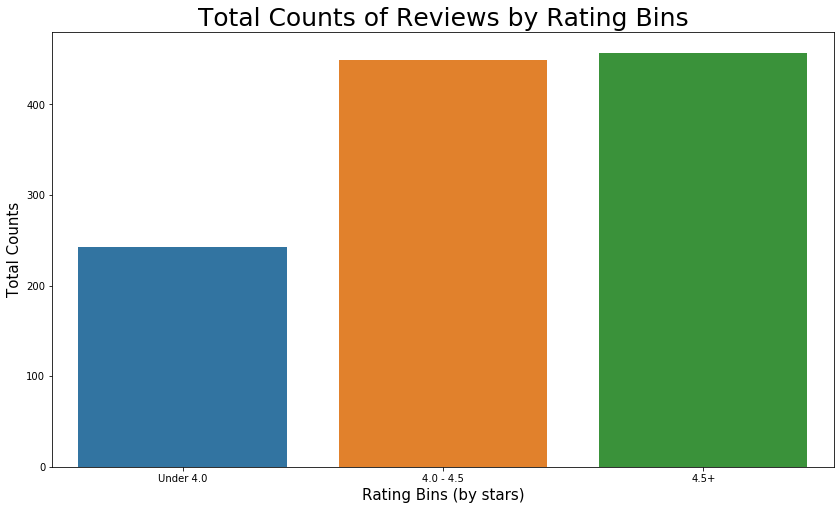

In [46]:
fig, ax = plt.subplots(figsize=(14,8))
fig = sns.countplot(x=cleaning_df["rating_bin"])
plt.title("Total Counts of Reviews by Rating Bins", fontsize=25)
plt.ylabel("Total Counts", fontsize=15)
plt.xlabel("Rating Bins (by stars)", fontsize=15)
fig.set_xticklabels(["Under 4.0", "4.0 - 4.5", "4.5+"], fontsize = 10)
plt.savefig("images/rating_bins.png");

I would say this binning method is fairly balanced and reflects the datatset well since most products do not get low ratings. 

Let's see if there are any correlations between the continuous variables. 

In [47]:
cleaning_df.corr()

,price,overall_rating,num_rating,recommend,target,rating_bin
price,1.000000,-0.164895,0.021887,-0.285743,-0.160714,-0.049332
overall_rating,-0.164895,1.000000,0.004300,0.838985,0.614332,0.734498
num_rating,0.021887,0.004300,1.000000,-0.030223,-0.004045,-0.037716
recommend,-0.285743,0.838985,-0.030223,1.000000,0.778544,0.585927
target,-0.160714,0.614332,-0.004045,0.778544,1.000000,0.604269
rating_bin,-0.049332,0.734498,-0.037716,0.585927,0.604269,1.000000


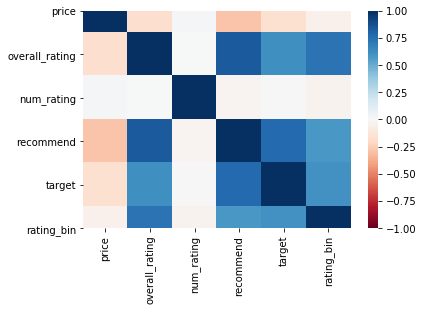

In [48]:
#creating a heatmap
corr=cleaning_df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax=1);

The heatmap shows that there are no correlation between price and other continuous features. Walmart is known for their low prices, so it would be interesting to see how the price is spread between the two target variables. 

However, the strongest correlation is between overall_rating and recommended score. I am interested in seeing the spread across the four sections that I scraped. 

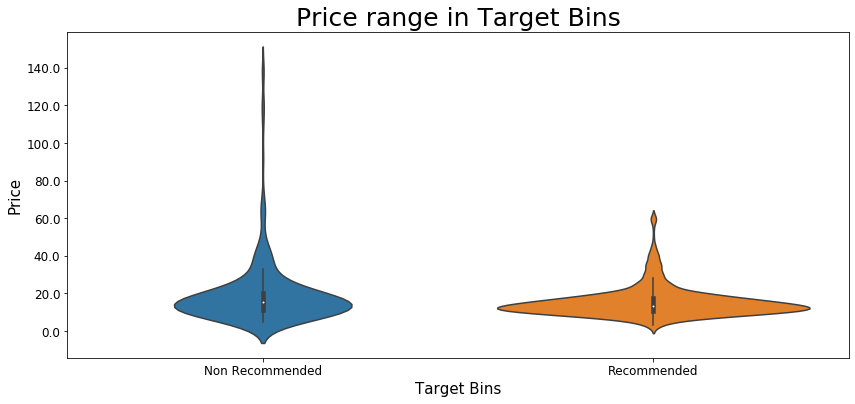

In [49]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.violinplot(x=cleaning_df["target"], y=cleaning_df["price"])
plt.title("Price range in Target Bins", fontsize=25)
plt.xlabel("Target Bins", fontsize=15)
plt.ylabel("Price", fontsize=15);
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.set_xticklabels(["Non Recommended", "Recommended"], size=12)
plt.savefig("images/price_rec.png");

Interestingly, Walmart does have items over \\$100.00 but it is no surprise that it is not a recommended item. Most of the recommended item are in the \\$15-$20 range. This shows that Walmart does live by their slogan, "Save money, Live better". 

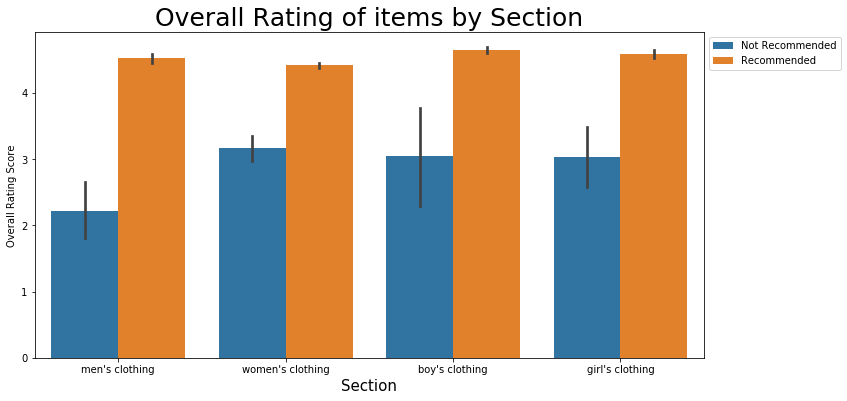

In [50]:
fig, ax= plt.subplots(figsize=(12,6))
sns.barplot(x="section", y="overall_rating", hue="target", data=cleaning_df)
plt.title("Overall Rating of items by Section", fontsize = 25)
plt.xlabel("Section", fontsize=15)
plt.ylabel("Overall Rating Score")
L=plt.legend(bbox_to_anchor=(1, 1))
L.get_texts()[0].set_text('Not Recommended')
L.get_texts()[1].set_text('Recommended')
plt.savefig('images/rating_section_target');

- As illustrated by the the heatmap, as overall rating score incresaes, so does the chance of item being recommended. This seems like logic, but this means that the binning of the recommended score works. 
- During the scraping, I did notice that women's clothing tend to have more reviews and the sentiment is generally positive for an item. However, due to one or two features of a product, the items would not be recommeneded. This is something I will need to look more into in the next notebook

In [51]:
#confirming the overall shape
cleaning_df.shape

(1149, 9)

In [52]:
# saving the cleaned dataframe as clean_df for preprocessing in the next notebook
cleaning_df.to_csv("data/clean_df.csv")